In [19]:
import gc
import pandas as pd
import numpy as np
import datetime as dt

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

import missingno as msno

import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
import plotly.offline

from colorama import Fore, Style, init
from pprint import pprint

import warnings
warnings.filterwarnings('ignore')

In [2]:
def PrintColor(text:str, color = Fore.BLUE, style = Style.BRIGHT):
    "Prints color outputs using colorama using a text F-string";
    print(style + color + text + Style.RESET_ALL);
    
def summarize_dataframe(df):
    summary_df = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary_df['missing#'] = df.isna().sum().values*100
    summary_df['missing%'] = (df.isna().sum().values*100)/len(df)
    summary_df['uniques'] = df.nunique().values
    summary_df['first_value'] = df.iloc[0].values
    summary_df['last_value'] = df.iloc[len(df)-1].values
    summary_df['count'] = df.count().values
    desc = pd.DataFrame(df.describe().T)
    summary_df['min'] = desc['min']
    summary_df['max'] = desc['max']
    summary_df['mean'] = desc['mean']
    return summary_df

In [13]:
games = pd.read_csv('nfl-big-data-bowl-2024/games.csv')
games.head(5).style.set_caption("Sample of the games data")


In [14]:
for col in games.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(games[col].isnull().sum()/games[col].shape[0]))
    PrintColor(f"\n---> {msg}");


---> column:     gameId	 Percent of NaN value: 0.00%

---> column:     season	 Percent of NaN value: 0.00%

---> column:       week	 Percent of NaN value: 0.00%

---> column:   gameDate	 Percent of NaN value: 0.00%

---> column: gameTimeEastern	 Percent of NaN value: 0.00%

---> column: homeTeamAbbr	 Percent of NaN value: 0.00%

---> column: visitorTeamAbbr	 Percent of NaN value: 0.00%

---> column: homeFinalScore	 Percent of NaN value: 0.00%

---> column: visitorFinalScore	 Percent of NaN value: 0.00%


In [15]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   gameId             136 non-null    int64 
 1   season             136 non-null    int64 
 2   week               136 non-null    int64 
 3   gameDate           136 non-null    object
 4   gameTimeEastern    136 non-null    object
 5   homeTeamAbbr       136 non-null    object
 6   visitorTeamAbbr    136 non-null    object
 7   homeFinalScore     136 non-null    int64 
 8   visitorFinalScore  136 non-null    int64 
dtypes: int64(5), object(4)
memory usage: 9.7+ KB


In [16]:
players_path = 'nfl-big-data-bowl-2024/players.csv'

players = pd.read_csv(players_path)
players.head(5).style.set_caption("Sample of the players data")

In [17]:
for col in players.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(players[col].isnull().sum()/players[col].shape[0]))
    PrintColor(f"\n---> {msg}");


---> column:      nflId	 Percent of NaN value: 0.00%

---> column:     height	 Percent of NaN value: 0.00%

---> column:     weight	 Percent of NaN value: 0.00%

---> column:  birthDate	 Percent of NaN value: 28.46%

---> column: collegeName	 Percent of NaN value: 0.00%

---> column:   position	 Percent of NaN value: 0.00%

---> column: displayName	 Percent of NaN value: 0.00%


<Axes: >

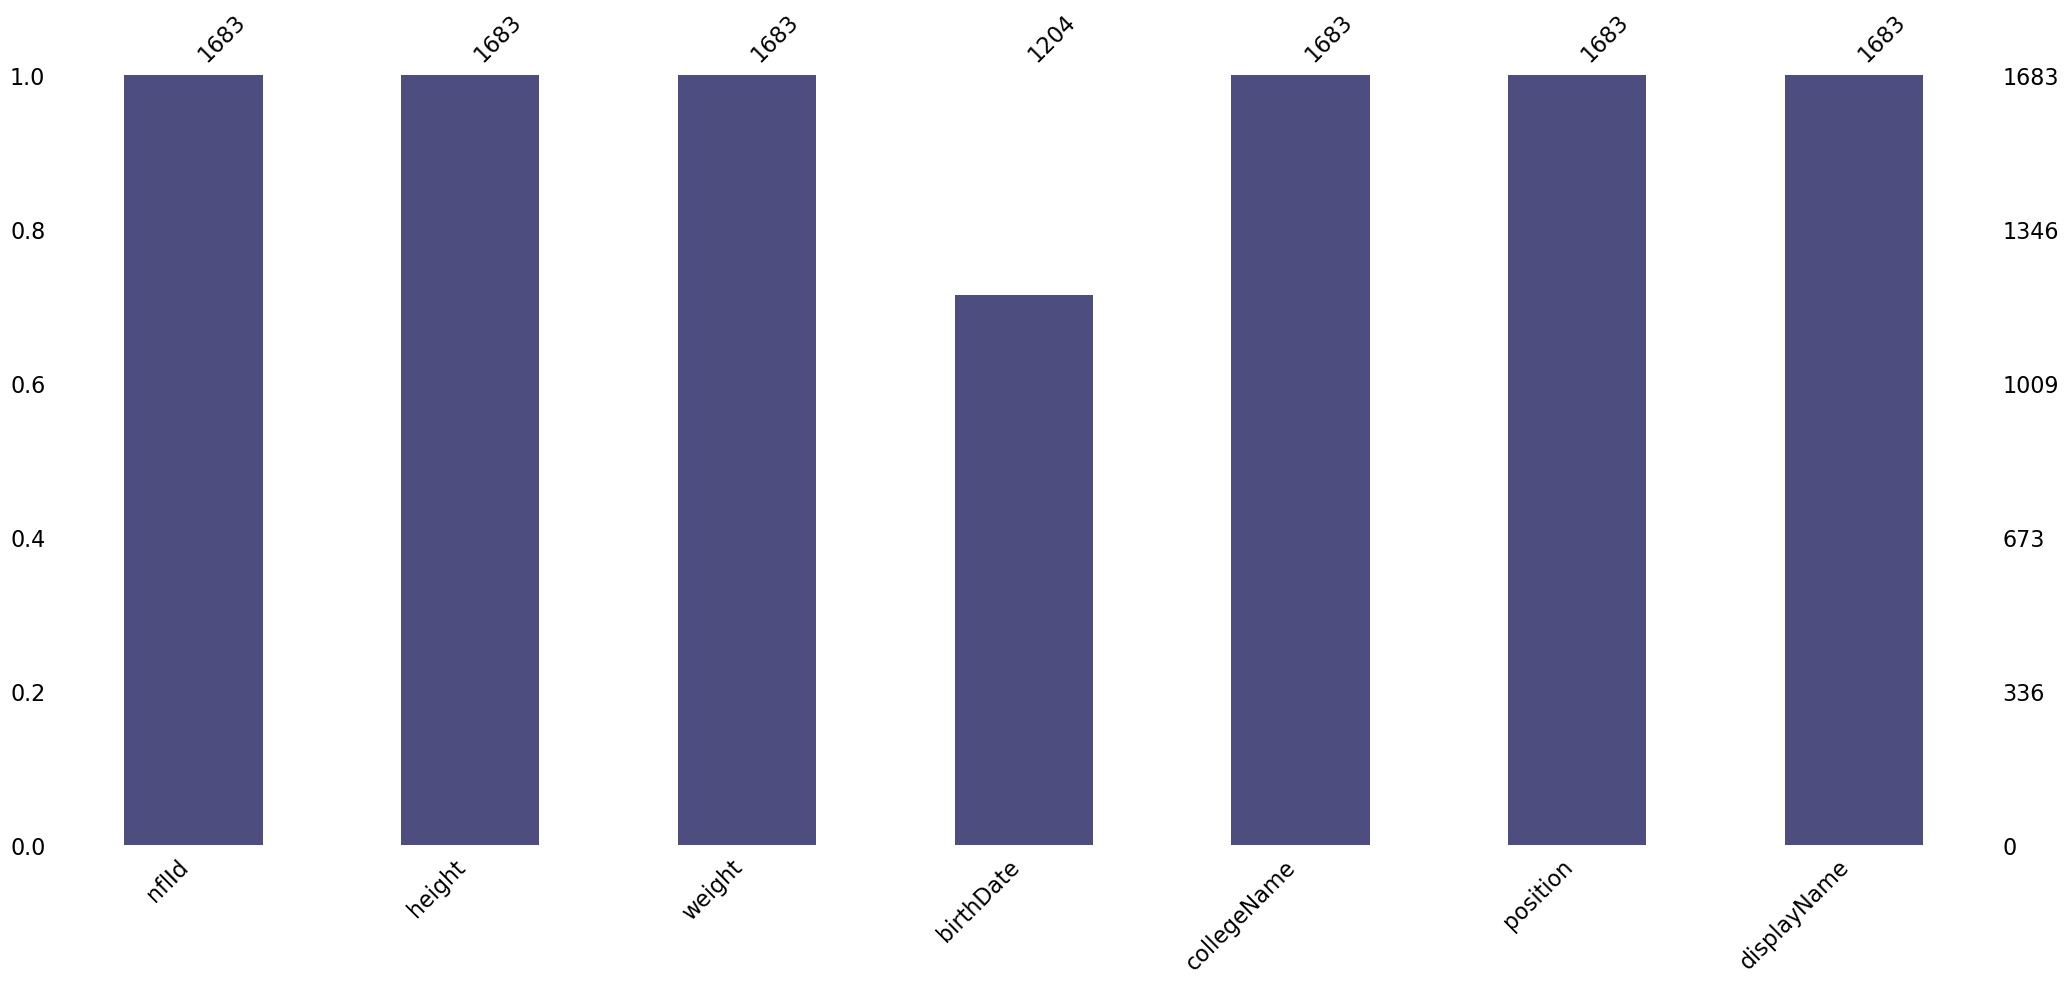

In [20]:
msno.bar(players, color=(0.3,0.3,0.5))

<Axes: >

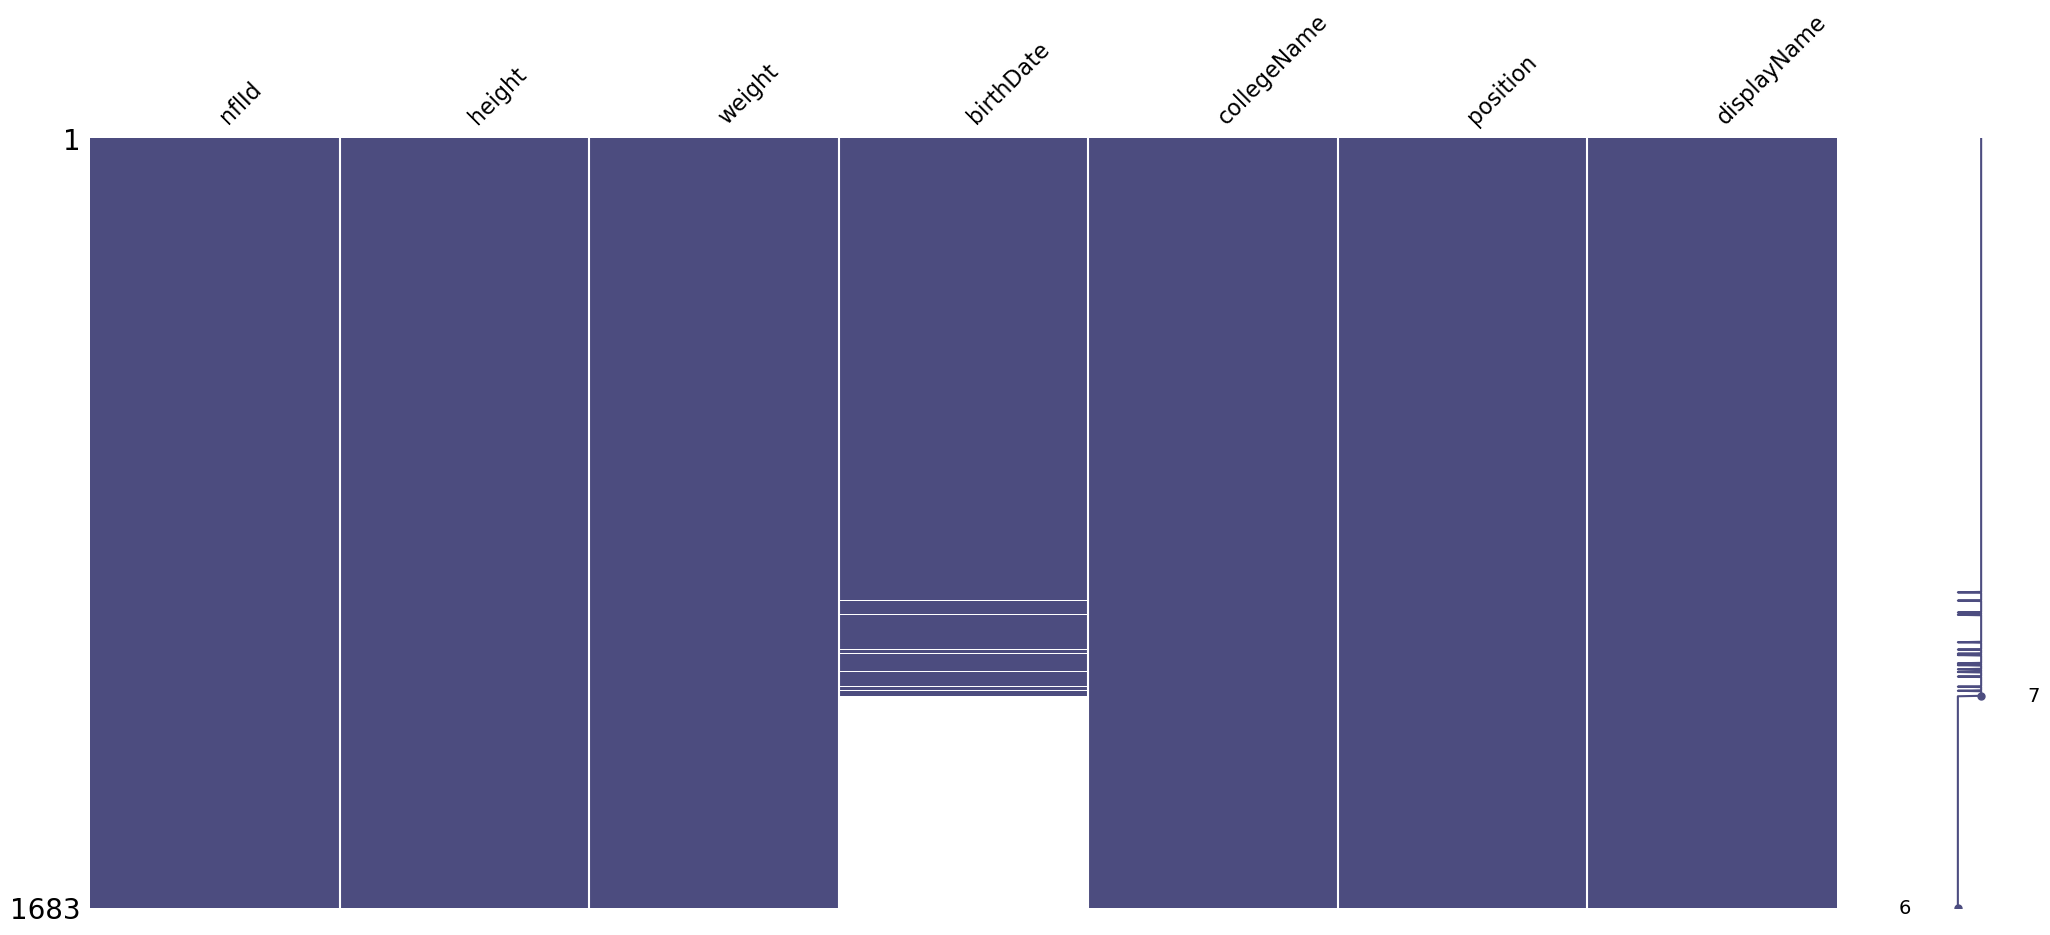

In [21]:
msno.matrix(players, color=(0.3,0.3,0.5))

In [22]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1683 entries, 0 to 1682
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        1683 non-null   int64 
 1   height       1683 non-null   object
 2   weight       1683 non-null   int64 
 3   birthDate    1204 non-null   object
 4   collegeName  1683 non-null   object
 5   position     1683 non-null   object
 6   displayName  1683 non-null   object
dtypes: int64(2), object(5)
memory usage: 92.2+ KB


In [23]:
summarize_dataframe(players).style.background_gradient(cmap='Purples')

In [24]:
plays_path = 'nfl-big-data-bowl-2024/plays.csv'

plays = pd.read_csv(plays_path)
plays.head(5).style.set_caption("Sample of the plays data")

In [25]:
for col in plays.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(plays[col].isnull().sum()/plays[col].shape[0]))
    PrintColor(f"\n---> {msg}");


---> column:     gameId	 Percent of NaN value: 0.00%

---> column:     playId	 Percent of NaN value: 0.00%

---> column: ballCarrierId	 Percent of NaN value: 0.00%

---> column: ballCarrierDisplayName	 Percent of NaN value: 0.00%

---> column: playDescription	 Percent of NaN value: 0.00%

---> column:    quarter	 Percent of NaN value: 0.00%

---> column:       down	 Percent of NaN value: 0.00%

---> column:  yardsToGo	 Percent of NaN value: 0.00%

---> column: possessionTeam	 Percent of NaN value: 0.00%

---> column: defensiveTeam	 Percent of NaN value: 0.00%

---> column: yardlineSide	 Percent of NaN value: 1.34%

---> column: yardlineNumber	 Percent of NaN value: 0.00%

---> column:  gameClock	 Percent of NaN value: 0.00%

---> column: preSnapHomeScore	 Percent of NaN value: 0.00%

---> column: preSnapVisitorScore	 Percent of NaN value: 0.00%

---> column: passResult	 Percent of NaN value: 51.11%

---> column: passLength	 Percent of NaN value: 54.88%

---> column: penaltyYards	 Perc

<Axes: >

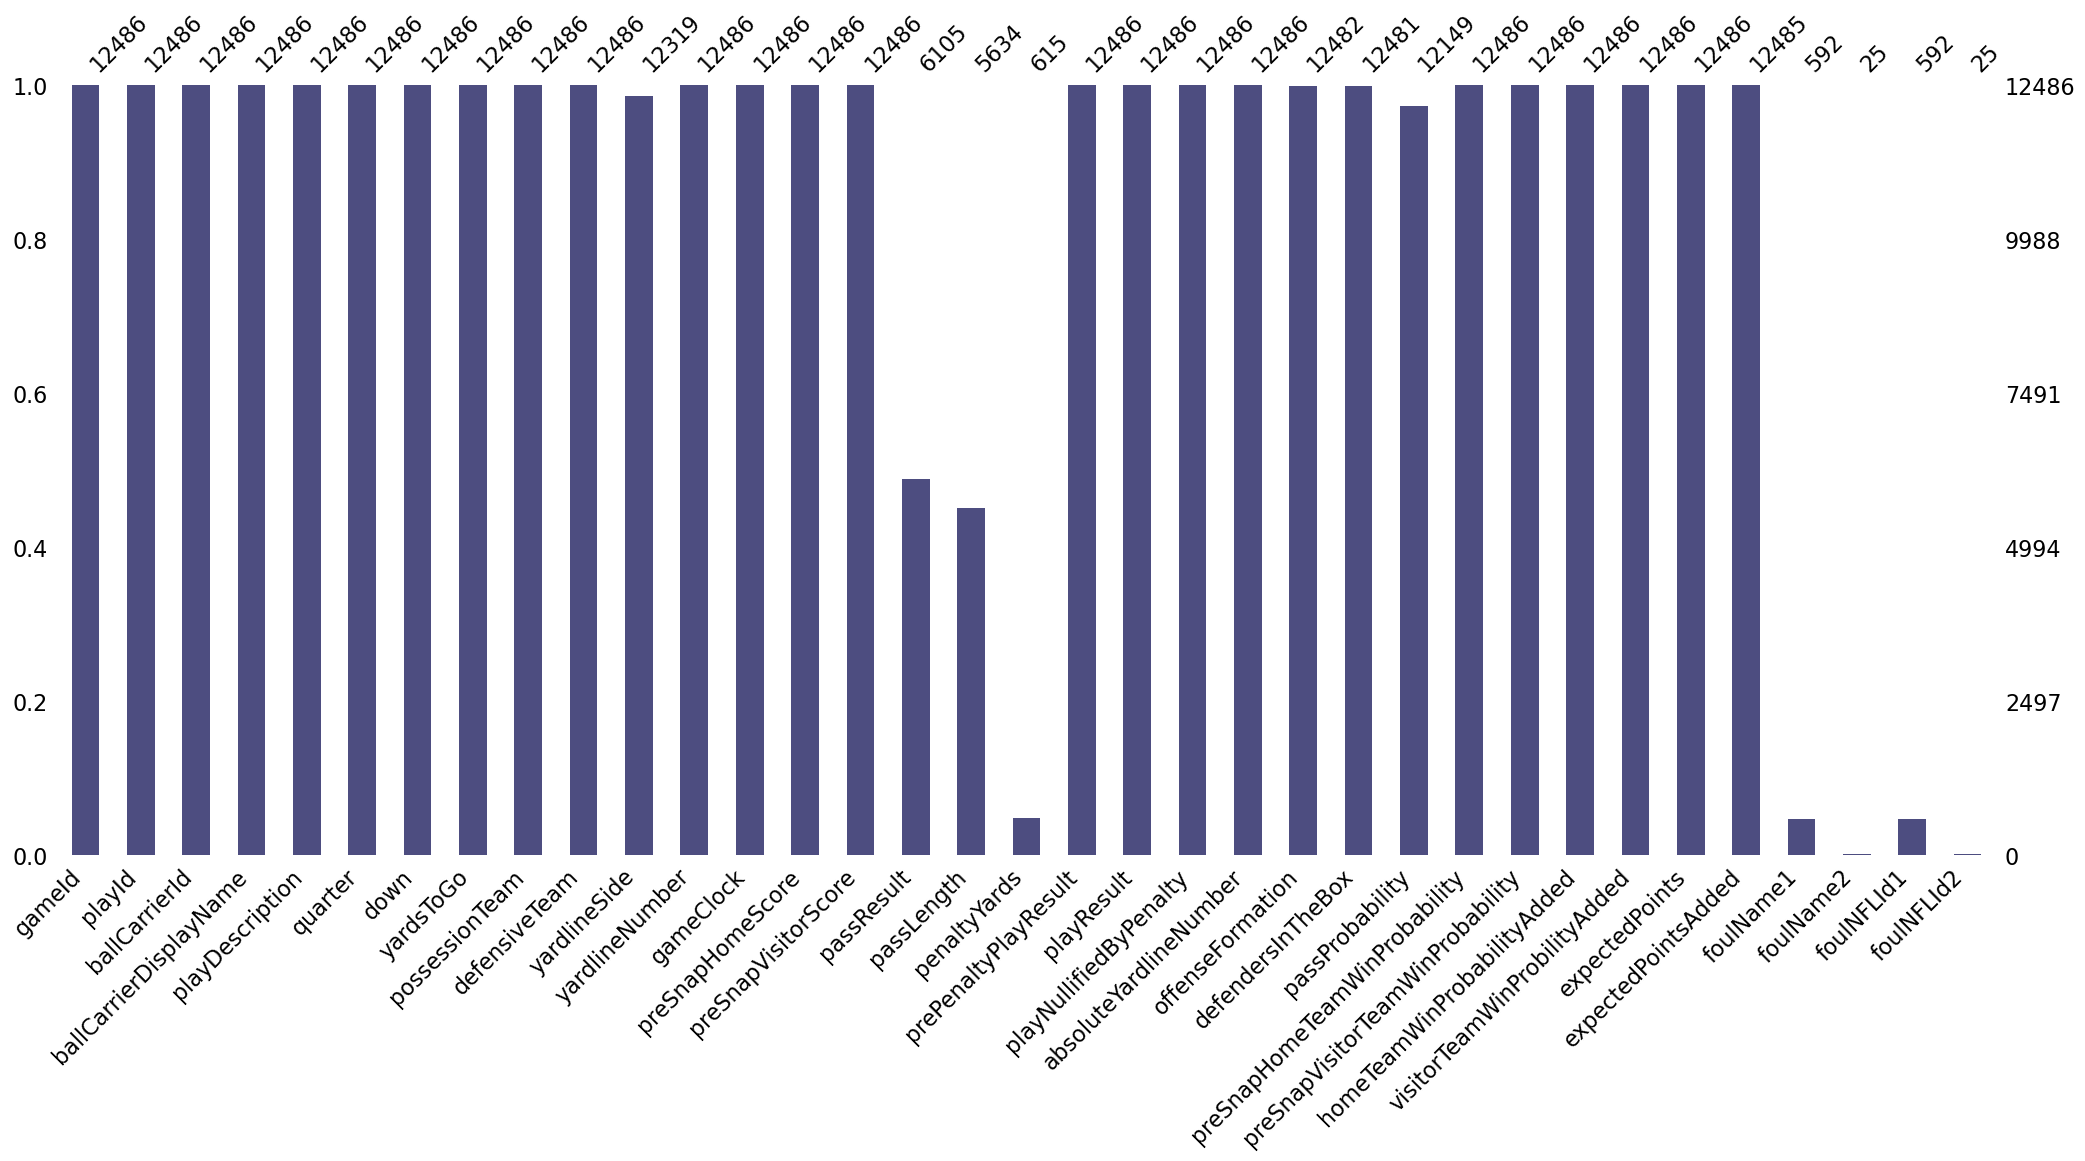

In [26]:
msno.bar(plays, color=(0.3,0.3,0.5))

<Axes: >

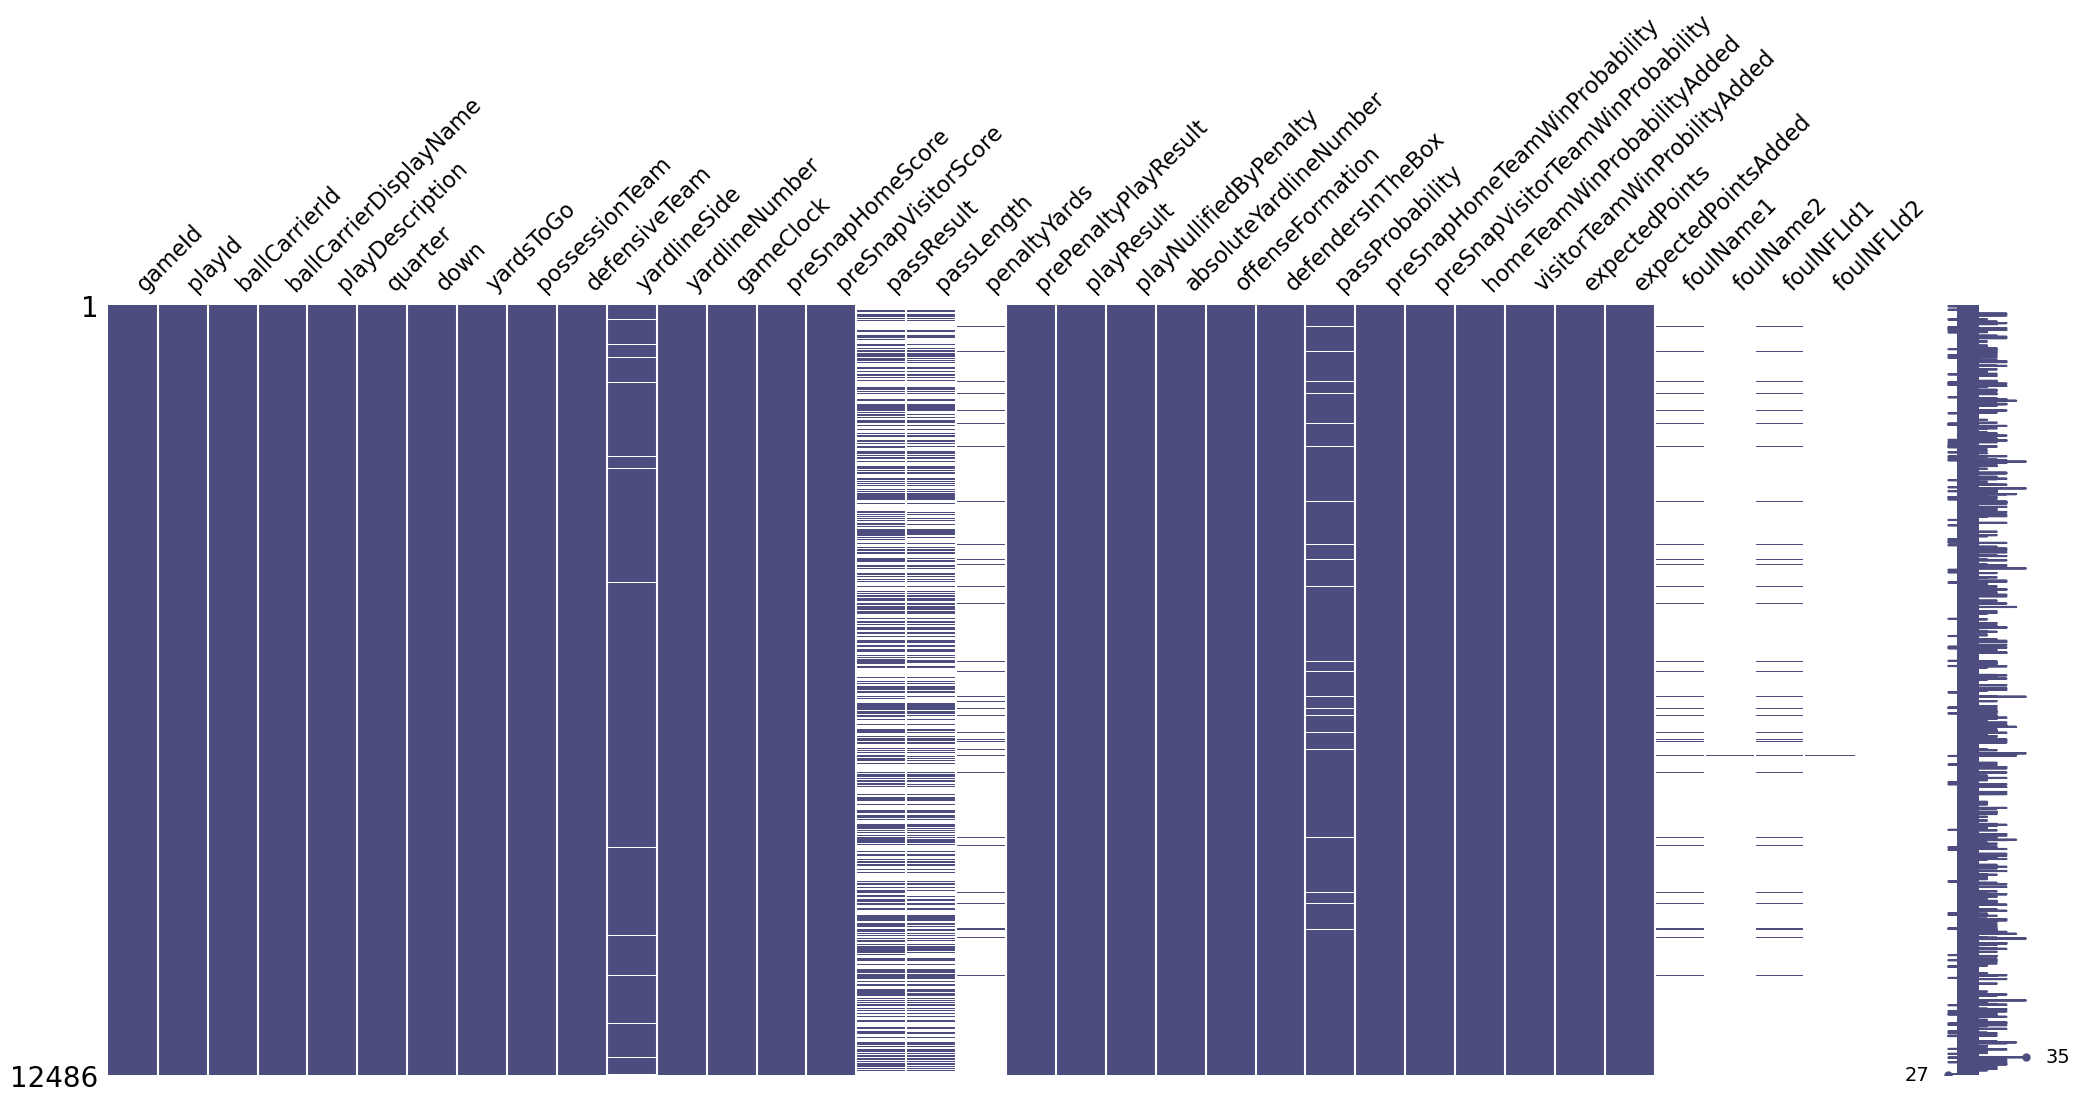

In [27]:
msno.matrix(plays, color=(0.3,0.3,0.5))

In [28]:
plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12486 entries, 0 to 12485
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   gameId                            12486 non-null  int64  
 1   playId                            12486 non-null  int64  
 2   ballCarrierId                     12486 non-null  int64  
 3   ballCarrierDisplayName            12486 non-null  object 
 4   playDescription                   12486 non-null  object 
 5   quarter                           12486 non-null  int64  
 6   down                              12486 non-null  int64  
 7   yardsToGo                         12486 non-null  int64  
 8   possessionTeam                    12486 non-null  object 
 9   defensiveTeam                     12486 non-null  object 
 10  yardlineSide                      12319 non-null  object 
 11  yardlineNumber                    12486 non-null  int64  
 12  game

In [29]:
summarize_dataframe(plays).style.background_gradient(cmap='Purples')

In [30]:
tackles_path = 'nfl-big-data-bowl-2024/tackles.csv'

tackles = pd.read_csv(tackles_path)
tackles.head(5).style.set_caption("Sample of the tackles data")

In [31]:
for col in tackles.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(tackles[col].isnull().sum()/tackles[col].shape[0]))
    PrintColor(f"\n---> {msg}");


---> column:     gameId	 Percent of NaN value: 0.00%

---> column:     playId	 Percent of NaN value: 0.00%

---> column:      nflId	 Percent of NaN value: 0.00%

---> column:     tackle	 Percent of NaN value: 0.00%

---> column:     assist	 Percent of NaN value: 0.00%

---> column: forcedFumble	 Percent of NaN value: 0.00%

---> column: pff_missedTackle	 Percent of NaN value: 0.00%


In [32]:
tackles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17426 entries, 0 to 17425
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   gameId            17426 non-null  int64
 1   playId            17426 non-null  int64
 2   nflId             17426 non-null  int64
 3   tackle            17426 non-null  int64
 4   assist            17426 non-null  int64
 5   forcedFumble      17426 non-null  int64
 6   pff_missedTackle  17426 non-null  int64
dtypes: int64(7)
memory usage: 953.1 KB


In [33]:
summarize_dataframe(tackles).style.background_gradient(cmap='Purples')

In [34]:
tracking_week_1_path = 'nfl-big-data-bowl-2024/tracking_week_1.csv'

tr_week_1 = pd.read_csv(tracking_week_1_path)
tr_week_1.head(5).style.set_caption("Sample of the Week 1 Tracking data")

In [35]:
for col in tr_week_1.columns:
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col,100*(tr_week_1[col].isnull().sum()/tr_week_1[col].shape[0]))
    PrintColor(f"\n---> {msg}");


---> column:     gameId	 Percent of NaN value: 0.00%

---> column:     playId	 Percent of NaN value: 0.00%

---> column:      nflId	 Percent of NaN value: 4.35%

---> column: displayName	 Percent of NaN value: 0.00%

---> column:    frameId	 Percent of NaN value: 0.00%

---> column:       time	 Percent of NaN value: 0.00%

---> column: jerseyNumber	 Percent of NaN value: 4.35%

---> column:       club	 Percent of NaN value: 0.00%

---> column: playDirection	 Percent of NaN value: 0.00%

---> column:          x	 Percent of NaN value: 0.00%

---> column:          y	 Percent of NaN value: 0.00%

---> column:          s	 Percent of NaN value: 0.00%

---> column:          a	 Percent of NaN value: 0.00%

---> column:        dis	 Percent of NaN value: 0.00%

---> column:          o	 Percent of NaN value: 4.34%

---> column:        dir	 Percent of NaN value: 4.34%

---> column:      event	 Percent of NaN value: 90.74%


<Axes: >

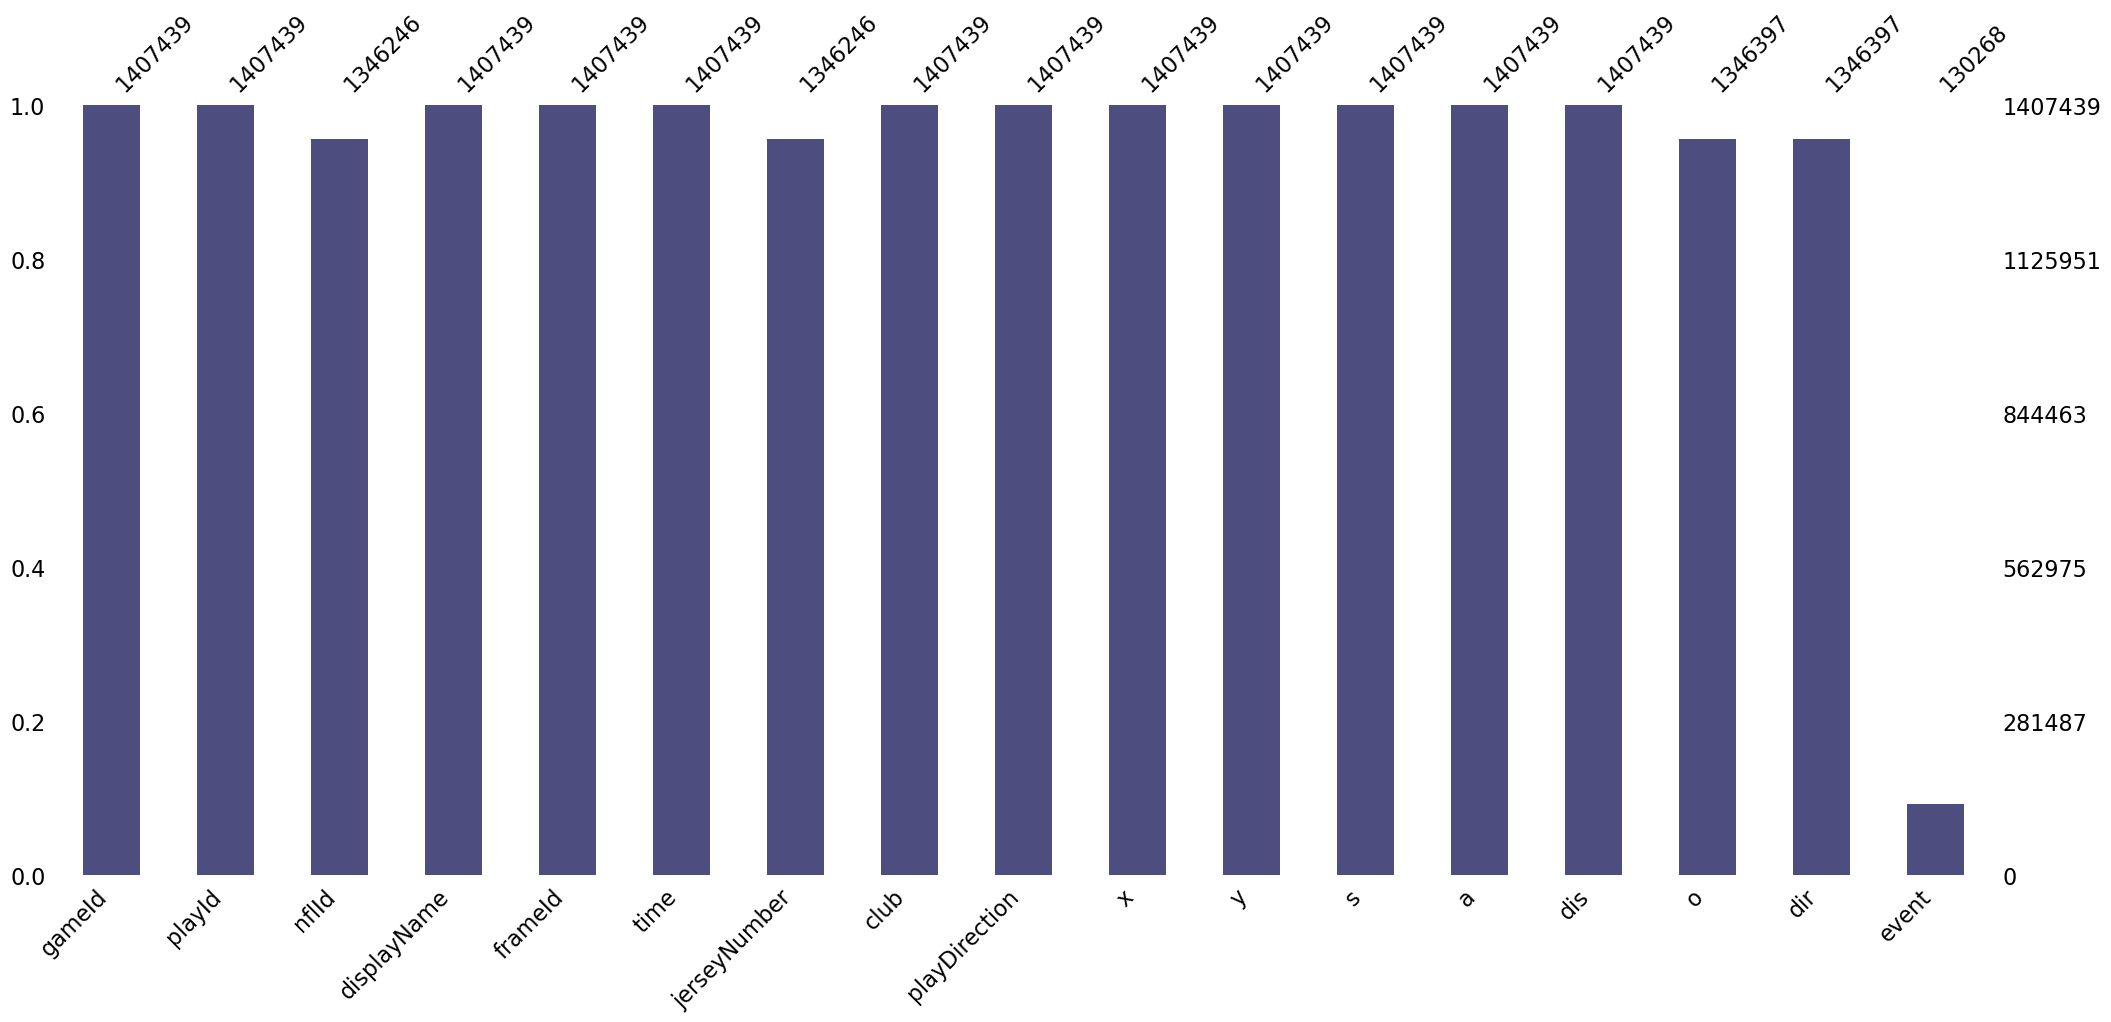

In [36]:
msno.bar(tr_week_1, color=(0.3,0.3,0.5))

<Axes: >

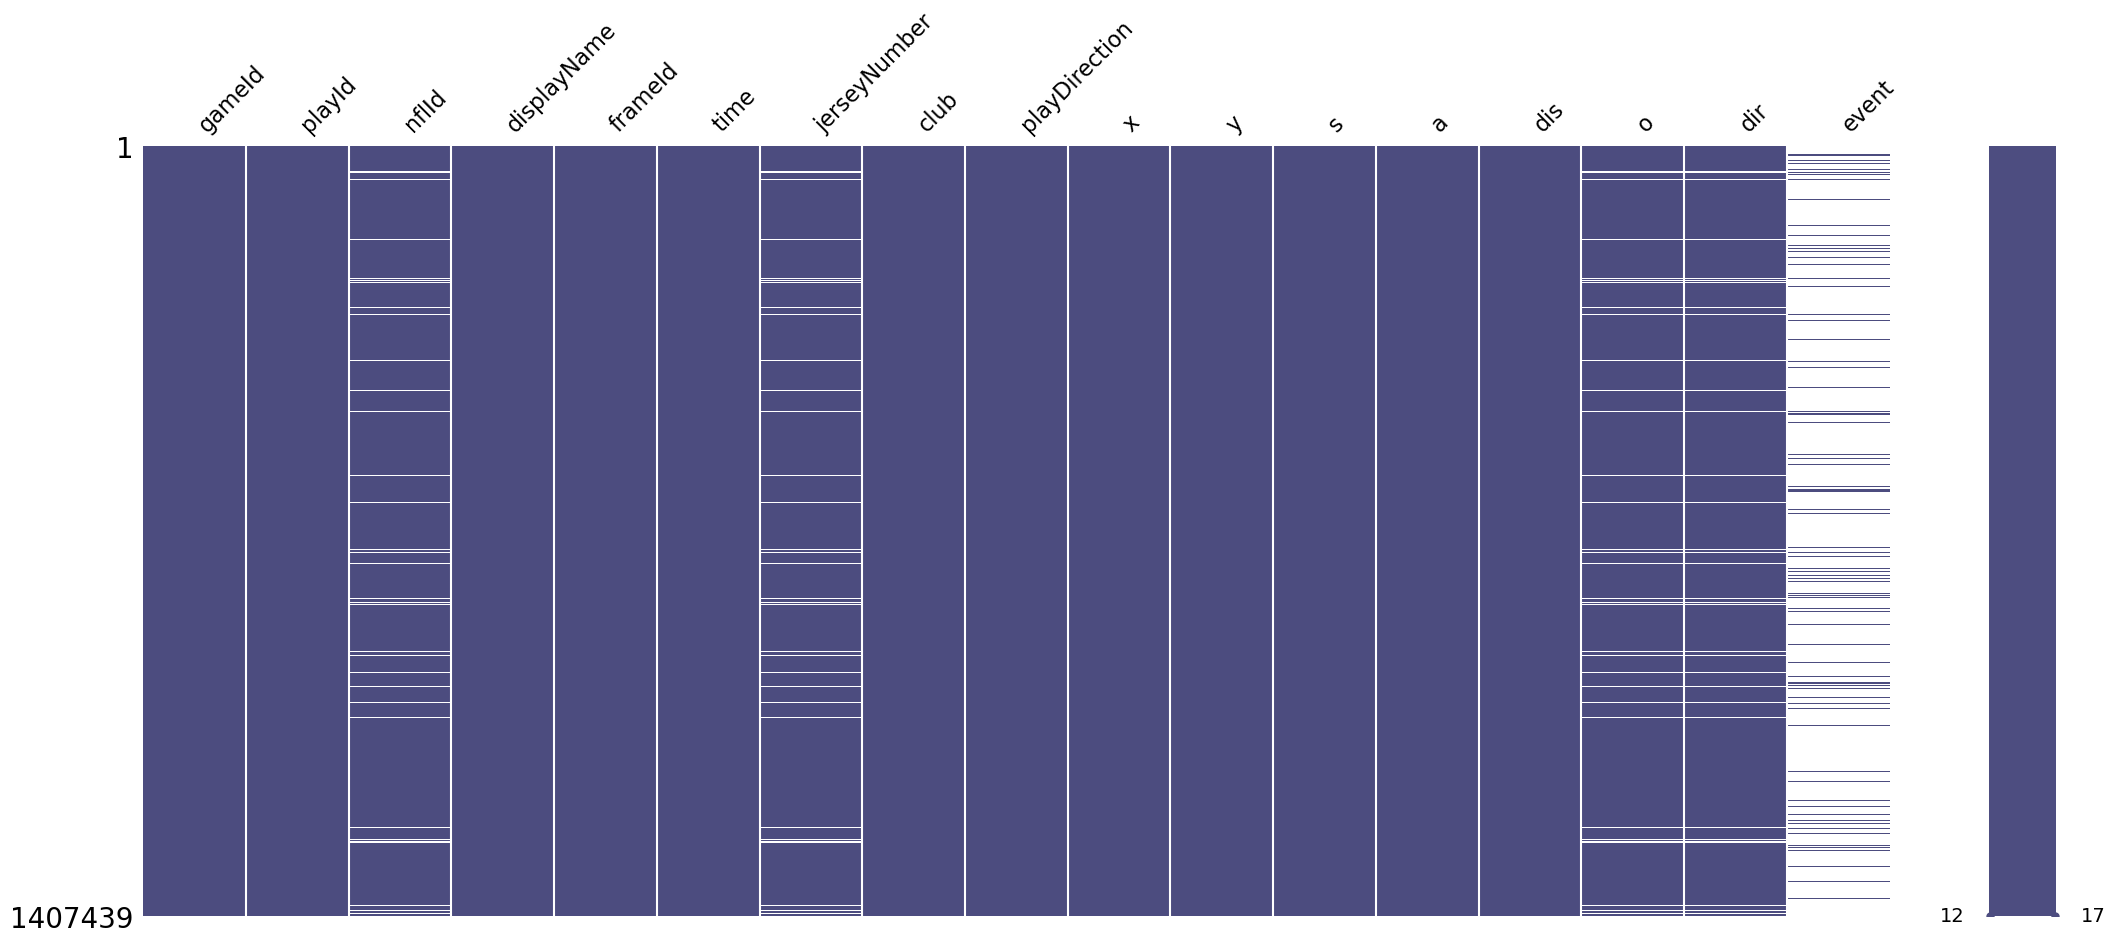

In [37]:
msno.matrix(tr_week_1, color=(0.3,0.3,0.5))

In [38]:
tr_week_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407439 entries, 0 to 1407438
Data columns (total 17 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   gameId         1407439 non-null  int64  
 1   playId         1407439 non-null  int64  
 2   nflId          1346246 non-null  float64
 3   displayName    1407439 non-null  object 
 4   frameId        1407439 non-null  int64  
 5   time           1407439 non-null  object 
 6   jerseyNumber   1346246 non-null  float64
 7   club           1407439 non-null  object 
 8   playDirection  1407439 non-null  object 
 9   x              1407439 non-null  float64
 10  y              1407439 non-null  float64
 11  s              1407439 non-null  float64
 12  a              1407439 non-null  float64
 13  dis            1407439 non-null  float64
 14  o              1346397 non-null  float64
 15  dir            1346397 non-null  float64
 16  event          130268 non-null   object 
dtypes: float

In [39]:
summarize_dataframe(tr_week_1).style.background_gradient(cmap='Purples')

In [40]:
check = games['gameDate'].value_counts().reset_index()

check.columns = [
    'date', 
    'games'
]

check = check.sort_values('date')

fig = px.bar(
    check, 
    y='date', 
    x="games", 
    orientation='h', 
    color='date',
    title='Number of games by dates', 
    height=900, 
    width=800,
    color_discrete_sequence=px.colors.qualitative.Prism,
)
fig.show()

In [41]:
check = games['week'].value_counts().reset_index()

check.columns = [
    'week', 
    'games'
]

check = check.sort_values('week')

fig = px.bar(
    check, 
    y='week', 
    x="games", 
    orientation='h', 
    color='games',
    text='games',
    title='Number of games by weeks', 
    height=900, 
    width=800,
    color_continuous_scale=px.colors.sequential.Purples
)
fig.show()

In [42]:
dfg_home = games['homeTeamAbbr'].value_counts().reset_index()
dfg_home.columns = ['team', 'number_of_home_games']

dfg_away = games['visitorTeamAbbr'].value_counts().reset_index()
dfg_away.columns = ['team', 'number_of_away_games']

outer_merged = pd.merge(
     dfg_home, dfg_away, how="outer", on=["team"]
)

fig = go.Figure()

fig.add_bar(x=outer_merged['team'],y=outer_merged['number_of_home_games'], 
            hovertext="Number of home games", name="number_of_home_games", 
            marker_color=px.colors.qualitative.Prism[0])
fig.add_bar(x=outer_merged['team'],y=outer_merged['number_of_away_games'], 
            hovertext="Number of visiting games", name="number_of_away_games", 
            marker_color=px.colors.qualitative.Prism[1])

fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=30, b=0, l=5, r=5),
    template="plotly_white",
    yaxis_title="Number of Games",
    title=dict(text='Home vs. Visiting Games by Teams', font=dict(size=20), yref='paper')
)

fig.update_coloraxes(colorbar_tickfont_size=10)
fig.update_annotations(font_size=12)
fig.update_traces(opacity=0.75)

fig.show()

In [43]:
outer_merged.style.set_caption("Home vs. Visiting Games by Teams")

In [44]:
agg_dict_1 = {
    "min_home_score": pd.NamedAgg(column='homeFinalScore', aggfunc='min'),
    "max_home_score": pd.NamedAgg(column='homeFinalScore', aggfunc='max'),
    "avg_home_score": pd.NamedAgg(column='homeFinalScore', aggfunc=np.mean),

}

agg_data = games.groupby("homeTeamAbbr").agg(**agg_dict_1).reset_index()

In [45]:
ig = go.Figure()

fig.add_bar(x=agg_data['homeTeamAbbr'],y=agg_data['min_home_score'], 
            hovertext="Minimal score in home games", name="min_home_score", 
            marker_color=px.colors.qualitative.Prism[0])
fig.add_bar(x=agg_data['homeTeamAbbr'],y=agg_data['avg_home_score'], 
            hovertext="Average score in home games", name="avg_home_score", 
            marker_color=px.colors.qualitative.Prism[1])
fig.add_bar(x=agg_data['homeTeamAbbr'],y=agg_data['max_home_score'], 
            hovertext="Maximal score in home games", name="max_home_score", 
            marker_color=px.colors.qualitative.Prism[2])


fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=30, b=0, l=5, r=5),
    template="plotly_white",
    yaxis_title="Scores",
    title=dict(text='Scores in Home Games by Teams', font=dict(size=20), yref='paper')
)

fig.update_coloraxes(colorbar_tickfont_size=10)
fig.update_annotations(font_size=12)
fig.update_traces(opacity=0.75)

fig.show()

In [46]:
agg_dict_2 = {
    "min_away_score": pd.NamedAgg(column='visitorFinalScore', aggfunc='min'),
    "max_away_score": pd.NamedAgg(column='visitorFinalScore', aggfunc='max'),
    "avg_away_score": pd.NamedAgg(column='visitorFinalScore', aggfunc=np.mean)
}

agg_data = games.groupby("visitorTeamAbbr").agg(**agg_dict_2).reset_index()

In [47]:
fig = go.Figure()

fig.add_bar(x=agg_data['visitorTeamAbbr'],y=agg_data['min_away_score'], 
            hovertext="Minimal score in away games", name="min_away_score", 
            marker_color=px.colors.qualitative.Prism[0])
fig.add_bar(x=agg_data['visitorTeamAbbr'],y=agg_data['avg_away_score'], 
            hovertext="Average score in away games", name="avg_away_score", 
            marker_color=px.colors.qualitative.Prism[1])
fig.add_bar(x=agg_data['visitorTeamAbbr'],y=agg_data['max_away_score'], 
            hovertext="Maximal score in away games", name="max_away_score", 
            marker_color=px.colors.qualitative.Prism[2])

fig.update_layout(
    showlegend=True,
    width=800,
    height=400,
    autosize=False,
    margin=dict(t=30, b=0, l=5, r=5),
    template="plotly_white",
    yaxis_title="Scores",
    title=dict(text='Scores in Away Games by Teams', font=dict(size=20), yref='paper')
)

fig.update_coloraxes(colorbar_tickfont_size=10)
fig.update_annotations(font_size=12)
fig.update_traces(opacity=0.75)

fig.show()